The goal of this sheet is to work through the exercises in *Bayesian Data Analysis, Third Edition* by Gelman, Carlin, Stern, Dunson, Vehtari, and Rubin. Various datasets and solutions are available at http://www.stat.columbia.edu/~gelman/book/

**1.** Suppose that if $\theta = 1$, then $y$ has a normal distribution with mean 1 and standard deviation $\sigma$ and if $\theta = 2$, then $y$ has a normal distribution with mean 2 and standard deviation $\sigma$. Also suppose $Pr(\theta = 1) = 0.5$ and $Pr(\theta = 2) = 0.5$.

In [1]:
# Create distributions y_1, y_2, and y based on this information.
import scipy.stats as stats

mu_1 = 1
mu_2 = 2
y_1 = lambda x: stats.norm.pdf(x, mu_1, sigma)
y_2 = lambda x: stats.norm.pdf(x, mu_2, sigma)
y = lambda x: (0.5) * y_1(x) + (0.5) * y_2(x)

**1(a)** For $\sigma = 2$, write the formula for for the marginal probability density for $y$ and sketch it.

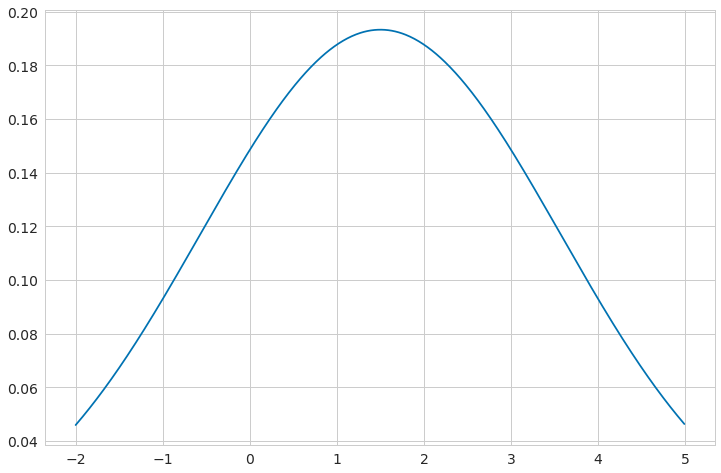

In [2]:
# Some plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 8), 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('colorblind', 8))

import numpy as np
x = np.arange(-2, 5, 0.01)
sigma = 2
plt.plot(x, y(x));

 $\newcommand{\given}{\;\lvert\;}$
**1(b)** What is $Pr(\theta = 1 \given y = 1)$, again supposing $\sigma = 2$?

From Bayes theorem, this is $\frac{P(y = 1 \given \theta = 1) Pr(\theta = 1)}{P(y = 1)}$, which in our notation is $\frac{y_1(1) (0.5) }{ y(1) }$:

In [3]:
y_1(1) * 0.5 / y(1)

0.5312093733737563

**1(c)** Describe how the posterior density of $\theta$ changes shape as $\sigma$ is increased and decreased.

In [4]:
# Let's experiment:
sigma = 100
print(y_1(1) * 0.5 / y(1))
sigma = 0.1
print(y_1(1) * 0.5 / y(1))

0.5000124999999973
1.0


So we see that in a high-variance situation, the data point $y=1$ provides very little information about which distribution it was from, whereas in a low-variance situation, it almost certainly came from the distribution with mean 1.

**2**. Show that $E(u) = E(E(u \given v))$ [1.8] and $var(u) = E(var(u \given v)) + var(E(u \given v))$ [1.9] hold if $u$ is a vector.

The definition of $E(u)$ is the vector whose components are $E(u_i)$, which by [1.8] is $E(E(u_i \given v))$.

For the diagonal elements of the covariance matrix, $$
var(u)_{ii} = var(u_i) = E(var(u_i \given v)) + var(E(u_i \given v)) = \big(E(var(u \given v)) + var(E(u \given v))\big)_{ii}
$$
by [1.9]. For the off-diagonal elements, we use $cov(x, y) = E(xy) - E(x)E(y)$ to obtain 
$$
\begin{align}
\big(E(var(u \given v)) + var(E(u \given v))\big)_{ij} 
  &= E\big(cov(u_i, u_j \given v)\big) + cov\big(E(u_i \given v), E(u_j \given v)\big) \\
  &= E\big(E(u_i u_j \given v) - E(u_i \given v) E(u_j \given v) \big) + 
       E\big( E(u_i \given v) E(u_j \given v) \big) - E\big( E(u_i \given v) \big) E\big( E(u_j \given v) \big)\\
  &= E(u_i u_j) - E \big( E(u_i \given v) E(u_j \given v) \big)
                + E \big( E(u_i \given v) E(u_j \given v) \big) + E(u_i) E(u_j) \qquad [1.8] \\
  &= cov(u_i, u_j) = var(u)_{ij}
\end{align}
$$


**3**. Suppose that in each individual of a large population there is a pair of genes, each of which can be either x or X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with xX or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$, and of heterozygotes is $2p(1 - p)$, where $0 < p < 1$. Each parent transmits one of its own genes to the child. If the parent is a heterozygoe, the probability that it transmits a gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1 + 2p}$.

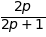

In [5]:
from sympy import symbols, S, init_printing
init_printing(use_unicode=True)
p = symbols('p')
# Probabilities of xx, (xX or Xx), XX
x, H, X = p**2, 2 * p * (1 - p), (1 - p)**2

# B for brown-eyed and b for blue-eyed
H_given_B = H / (H + X)
X_given_B = X / (H + X)

HH_parents_given_B_parents = H_given_B**2
HX_parents_given_B_parents = 2 * H_given_B * X_given_B # parents are HX or XH
XX_parents_given_B_parents = X_given_B**2

X_given_B_parents = (
    HH_parents_given_B_parents * (S(1) / 4) +
    HX_parents_given_B_parents * (S(1) / 2) +
    XX_parents_given_B_parents * (1))

H_given_B_parents = (
    HH_parents_given_B_parents * (S(1) / 2) +
    HX_parents_given_B_parents * (S(1) / 2) +
    XX_parents_given_B_parents * (0))

H_given_B_and_B_parents = H_given_B_parents / (H_given_B_parents + X_given_B_parents)
H_given_B_and_B_parents.simplify()

**3 (cont)**. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote and they have $n$ children, all brown-eyed. Find the posterior probability that Judy is a heterozygote.

Applying Bayes Theorem, we have 
$$
P(H \,\lvert\, n \textrm{ B children }) = \frac{P(n \textrm{ B children } \,\lvert\, H) P(H) }
                                         {P(n \textrm{ B children} ) }
$$

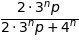

In [6]:
n = symbols('n')

n_B_given_H = (S(3) / 4)**n
judy_is_H = H_given_B_and_B_parents
n_B_given_X = 1
n_B = n_B_given_H * judy_is_H + n_B_given_X * (1 - judy_is_H)

(n_B_given_H * judy_is_H / n_B).simplify()

**3 (cont)**. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote and they have $n$ children, all brown-eyed. Find the probability that Judy's first grandchild has blue eyes.

We have two independent events: (1) Judy's child's spouse passes an x and (2) Judy's child passes an x.

(1) is $(x)(1) + (H) \frac{1}{2}$.

(2) is (child is H | "known information") $\cdot \frac{1}{2}$

(child is H | "known information") is (posterior for judy is h) \* (2/3) + (1 - posterior for judy is h) \* (1/2)

The final answer is the product of (1) and (2)

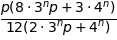

In [7]:
judy_is_H_posterior = (n_B_given_H * judy_is_H / n_B)

child_spouse_passes_x = x + (S(1) / S(2)) * H
child_H_given_child_B = judy_is_H_posterior * (S(2) / S(3)) + (S(1) - judy_is_H_posterior) * S((1) / S(2))
child_passes_x = child_H_given_child_B * (S(1) / S(2))
grandchild_is_b = child_passes_x * child_spouse_passes_x

grandchild_is_b.simplify()

**4**. We will use the football dataset to estimate some conditional probabilities about professional football games. There were twelve games with point spreads of 8 points; the outcomes in those games were -7, -5, -3, 1, 6, 7, 13, 15, 16, 20, 21, with positive values indicating wins by the favorite and negative values indicating wins by the underdog. Consider the following probabilities:
* Pr(favorite wins | point spread = 8)
* Pr(favorite wins by at least 8 | point spread = 8)
* Pr(favorite wins by at least 8 | point spread = 8 and favorite wins)

**(a)** Estimate each of these using the relative frequencies of games with a point spread of 8

In [8]:
(8/12, 5/12, 5/8)

**(b)** Estimate each of these using the normal approximation for the distribution of (outcome - point spread)

In [9]:
# To correct for integer discreteness, we assume winning means outcome > 1/2, 
# winning by at least 8 means outcome > 7.5, etc.
(1 - stats.norm.cdf(0.5, 8, 13.86),  # 1 - P(lose)
 1 - stats.norm.cdf(7.5, 8, 13.86),
 (1 - stats.norm.cdf(7.5, 8, 13.86)) / (1 - stats.norm.cdf(-0.5, 8, 13.86)))
 

**5**. TODO

**6**. Approximately $ 1 / 125 $ of all births are fraternal twins and $ 1 / 300 $ are identical twins. Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

In [10]:
P_fra = S(1) / 125
P_ident = S(1) / 300
P_fra_brother = P_fra / 2
P_ident / (P_ident + P_fra_brother)

**9** Simulate data for patients arriving and being treated at a clinic

In [11]:
# Treatment is uniform random on the interval: [5 minutes, 20 minutes]
get_treatment_time = lambda : stats.uniform.rvs(loc=5, scale=15, size=1)[0]

# Arrival times are exponential with expectation 10 minutes
get_arrival_delta = lambda: stats.expon.rvs(loc=0, scale=10, size=1)[0]

def get_summary_stats(logging=False):
    # Over-allocate the array, we'll truncate when we're done
    wait_times = np.array([0] * 1000) 
    
    next_free = [0, 0, 0] # These are the clock times, in minutes, of the next availability for each doctor
    
    patient_idx = 0
    last_arrival_time = arrival_delta = get_arrival_delta()
    while last_arrival_time < 7 * 60:
        wait_time, doctor = None, None
        
        if logging:
            print(f'Patient arrives at {last_arrival_time:.1f} minutes, free times are {next_free}')
        
        # Look for a free doctor. If there is one, set wait_time to 0.
        for doc_index, doctor_free_time in enumerate(next_free):
            if last_arrival_time > doctor_free_time and wait_time is None:
                wait_time, doctor = 0, doc_index
                next_free[doctor] = last_arrival_time # We will add wait time to this below

        # Find the next available doctor, set the wait time.
        if wait_time is None:
            doctor = np.argmin(next_free)
            wait_time = next_free[doctor] - last_arrival_time

        # Update the wait times and the next free times
        treatment_time = get_treatment_time()
        wait_times[patient_idx] = wait_time
        next_free[doctor] += treatment_time  
        
        if logging:
            print(f'Patient {patient_idx} will be served by doctor {doctor} with a {wait_time:.1f} minute wait')
            print(f'Treatment will take {treatment_time:.1f} minutes')
            print()
            
        # Sample next patient
        arrival_delta = get_arrival_delta()
        last_arrival_time += arrival_delta
        patient_idx += 1
    
    
    wait_times = wait_times[:patient_idx]
    out = {
        'total_patients': len(wait_times),
        'num_waiting': sum(wait_times > 0),
        'office_close_time': max(max(next_free), 420)
    }
    if out['num_waiting'] > 0:
        out['avg_wait_time'] = np.mean([_ for _ in wait_times if _ > 0])
    else:
        out['avg_wait_time'] = 0
    return out

In [12]:
get_summary_stats()

{'avg_wait_time': 2.8333333333333335,
 'num_waiting': 6,
 'office_close_time': 435.27618815483095,
 'total_patients': 49}

In [13]:
total_patients = []
num_waiting = []
avg_wait_times = []
close_times = []

for _ in range(100):
    sample = get_summary_stats()
    total_patients.append(sample['total_patients'])
    num_waiting.append(sample['num_waiting'])
    avg_wait_times.append(sample['avg_wait_time'] if sample['avg_wait_time'] is not np.NaN else 0)
    close_times.append(sample['office_close_time'])

total_patients = sorted(total_patients)
num_waiting = sorted(num_waiting)
avg_wait_times = sorted([_ for _ in avg_wait_times if _ > 0])
close_times = sorted(close_times)

print(f'''
                       25th -- 50th -- 75th percentiles for key stats:
                       
Total patients served:        {total_patients[24]} -- {total_patients[49]} -- {total_patients[74]}
Number of patients waiting:   {num_waiting[24]} -- {num_waiting[49]} -- {num_waiting[74]}
Average wait time in minutes: {avg_wait_times[24]:.1f} -- {avg_wait_times[49]:.1f} -- {avg_wait_times[74]:.1f}
Average close times in minutes after 4:00pm: {close_times[24] - 420:.1f} -- {close_times[49] - 420:.1f} -- {close_times[74] - 420:.1f}
''')


                       25th -- 50th -- 75th percentiles for key stats:
                       
Total patients served:        37 -- 41 -- 46
Number of patients waiting:   2 -- 4 -- 7
Average wait time in minutes: 3.0 -- 4.0 -- 5.7
Average close times in minutes after 4:00pm: 0.0 -- 6.3 -- 13.1

